In [79]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.linear_model import LinearRegression 

from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_boston

In [4]:
boston = load_boston()
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [20]:
# for line in boston.DESCR.split('\n'):
#     print(line)

In [12]:
data = boston.data
feature_names = boston.feature_names
price = boston.target

In [13]:
X = pd.DataFrame(data, columns = feature_names )
X_train, X_test, y_train, y_test = train_test_split(X, price, test_size = 0.2, random_state = 42)

In [17]:
scaler = StandardScaler()

In [19]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_train_scaled = pd.DataFrame(X_train_scaled, columns = feature_names)
X_test_scaled = pd.DataFrame(X_test_scaled, columns = feature_names)

# Примененеие TSNE

In [29]:
tsne = TSNE(n_components=2, learning_rate=250, random_state=42)
X_train_tsne = tsne.fit_transform(X_train_scaled)
X_train_tsne

array([[ 28.13809   ,  18.375324  ],
       [ -9.785578  ,  -4.5355387 ],
       [-15.695753  , -17.543627  ],
       [ 37.924854  ,  13.517046  ],
       [ -8.786393  ,   3.9951665 ],
       [-13.988173  ,  -7.7626657 ],
       [-11.960751  ,  -7.4771976 ],
       [-18.704308  , -23.812914  ],
       [ 38.665813  ,  12.55771   ],
       [ 35.53426   ,  11.327715  ],
       [-12.056245  ,  -8.116859  ],
       [ -5.7400675 ,  -5.8184624 ],
       [ -2.0275154 ,  -8.284211  ],
       [ 35.76188   ,  12.485169  ],
       [ -2.2966845 , -10.11944   ],
       [-10.227566  ,   7.138571  ],
       [ -7.261146  ,   1.1323055 ],
       [-14.401978  , -18.217144  ],
       [-13.338248  , -12.094605  ],
       [-17.165924  , -12.843067  ],
       [ 34.02783   ,  17.060034  ],
       [ -4.4231987 ,   0.22272195],
       [-15.497815  ,  -7.9093003 ],
       [-10.733389  ,  -5.5205164 ],
       [-18.339699  , -23.839216  ],
       [ -3.087924  ,  -8.492775  ],
       [  8.2998    ,   2.3935862 ],
 

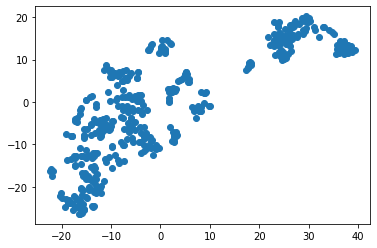

In [30]:
plt.scatter(X_train_tsne[:,0], X_train_tsne[:,1] )

РАЗОБЬЕМ ДАННЫЕ НА  КЛАСТЕРА

In [32]:
kmeans = KMeans(n_clusters=3, max_iter = 100, random_state=42)

In [34]:
labels_train = kmeans.fit_predict(X_train_scaled)
pd.value_counts(labels_train )

0    191
1    127
2     86
dtype: int64

In [36]:
labels_test = kmeans.predict(X_test_scaled)

Text(-24, -27, 'кластер 2')

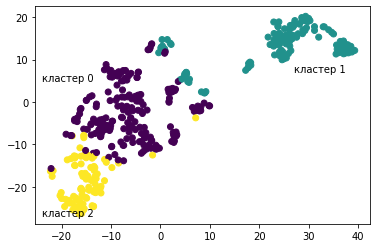

In [46]:
plt.scatter(X_train_tsne[:,0], X_train_tsne[:,1], c = labels_train)
plt.text(-24, 5, 'кластер 0')
plt.text(27, 7, 'кластер 1')
plt.text(-24, -27, 'кластер 2')

In [48]:
y_train.mean()

22.796534653465343

In [49]:
y_train[labels_train==0].mean()

24.958115183246072

In [50]:
y_train[labels_train==1].mean()

16.165354330708663

In [51]:
y_train[labels_train==2].mean()

27.78837209302326

Text(0.5, 0, 'цена')

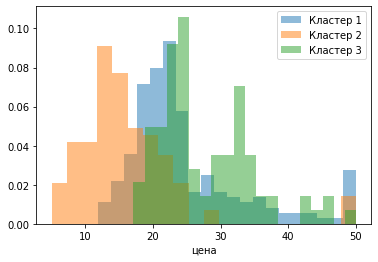

In [76]:
plt.hist(y_train[labels_train==0], bins=20, density = True, alpha = 0.5)
plt.hist(y_train[labels_train==1], bins=20, density = True, alpha = 0.5)
plt.hist(y_train[labels_train==2], bins=20, density = True, alpha = 0.5)
plt.legend(['Кластер 1', 'Кластер 2', 'Кластер 3'])
plt.xlabel('цена')

In [65]:
X_train.loc[labels_train==0, 'RM'].mean()

477    15.02340
15      0.62739
Name: CRIM, dtype: float64

In [66]:
X_train.loc[labels_train==0, 'CRIM'].mean()

0.42166020942408367

In [67]:
X_train.loc[labels_train==2, 'CRIM'].mean()

0.07356558139534886

Text(0.5, 0, 'криминальность')

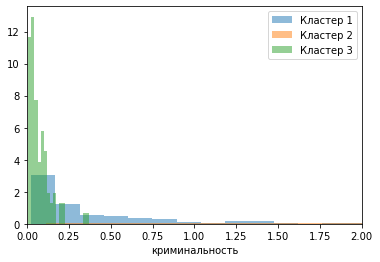

In [75]:
plt.hist(X_train.loc[labels_train==0, 'CRIM'], bins=20, density = True, alpha = 0.5)
plt.hist(X_train.loc[labels_train==1, 'CRIM'], bins=20, density = True, alpha = 0.5)
plt.hist(X_train.loc[labels_train==2, 'CRIM'], bins=20, density = True, alpha = 0.5)
plt.legend(['Кластер 1', 'Кластер 2', 'Кластер 3'])
plt.xlim(0, 2)
plt.xlabel('криминальность')

In [80]:
lr = LinearRegression()

In [81]:
lr.fit(X_train_scaled, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [83]:
y_test_pred = lr.predict(X_test_scaled)

In [85]:
r2_score(y_test, y_test_pred)

0.668759493535632

# Посчитаем метрики на моделях разных кластеров 

In [88]:
lr.fit(X_train_scaled.loc[labels_train==0, :], y_train[labels_train==0])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [93]:
y_test_pred_0 = lr.predict(X_test_scaled.loc[labels_test==0, :])
r2_score(y_test[labels_test==0], y_test_pred_0)

0.721524042313201

In [95]:
lr.fit(X_train_scaled.loc[labels_train==1, :], y_train[labels_train==1])
y_test_pred_1 = lr.predict(X_test_scaled.loc[labels_test==1, :])
r2_score(y_test[labels_test==1], y_test_pred_1)

0.5231073527102176

In [ ]:
Кластер 2


In [96]:
lr.fit(X_train_scaled.loc[labels_train==2, :], y_train[labels_train==2])
y_test_pred_2 = lr.predict(X_test_scaled.loc[labels_test==2, :])
r2_score(y_test[labels_test==2], y_test_pred_2)

0.9155161972050821

In [100]:
y_test_all = np.hstack([y_test[labels_test==0], y_test[labels_test==1], y_test[labels_test==2]])
y_test_pred_all = np.hstack([y_test_pred_0, y_test_pred_1, y_test_pred_2])
r2_score(y_test_all, y_test_pred_all)

0.7955010967203695